# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 08: Extracción de datos online - Webscraping</center></h1>

Este ejercicio busca que los estudiantes aprendan a usar librerias en Python para la lectura de datos desde la Web.


## 1. Nueva librería: `BeautifulSoup`.

Python tiene librerías específicas para hacer Web Scraping, las que nos ayudan a procesar el código HTML para analizarlo y recuprar los datos relevantes. 

El proceso de webscrapping en su expresión mas básica consiste en la extracción de datos desde el texto plano que estructura la página web (HTML). `requests` nos brinda herramientas para la extracción de la página, y a continuación podemos usar otras librerías como `BeautifulSoup` para la extracción de elementos o información contenida en el texto plano.

### Para instalar `BeautifulSoup`:

Esta librería está disponible en Anaconda, por lo que no deberían necesitar instalarlo, pero por si no lo tienen las opciones son:

`pip install BeautifulSoup4`

o

`conda install beautifulsoup4`

## 2. Extraccion por Web Scraping

Partamos cargando las librerías relevantes para esta clase.

In [ ]:
# librerías
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

### 2.1 Leamos el código HTML de ejemplo

Veamos primero un ejemplo simple de código HTML para comprender su estructura general.

In [ ]:
html_text=open('ejemplo.html','r').read()
html_text

### 2.2 Usemos `BeautifulSoup` para hacer sentido de este código

Usamos la librería para revisar el código HTML y poder hacer sentido de lo que tenemos.

In [ ]:
soup = bs(html_text, "html.parser")
soup

Esta librería además nos permite buscar información en forma simple y rápido:

In [ ]:
soup.table.find_all('tr')

In [ ]:
table = soup.find('table')
print(table)

### 2.3 Usemos `BeautifulSoup` para hacer sentido de este código

Usamos la librería para revisar el código HTML y poder hacer sentido de lo que tenemos.

In [ ]:
df = pd.DataFrame(columns=['Curso', 'Creditos', 'nEstudiantes'])
table = soup.find('table')
rows = table.find_all('tr')

for row in rows[1::]:
    cols = row.find_all("td")
    col_text=[c.text for c in cols]
    print(col_text)
    new_row = pd.DataFrame({'Curso':col_text[0], 'Creditos':col_text[1], 'nEstudiantes':col_text[2]}, index=['Curso'])
    df = pd.concat([df, new_row], ignore_index=True)
df

## 3. Apliquemos lo aprendido

Tratemos de contestar la siguiente pregunta:
¿Cuanto exporta de café el mayor exportador del mundo con respecto a todas las exportaciones mundiales?

Esta información la podemos extraer de Wikipedia como fuente: https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production

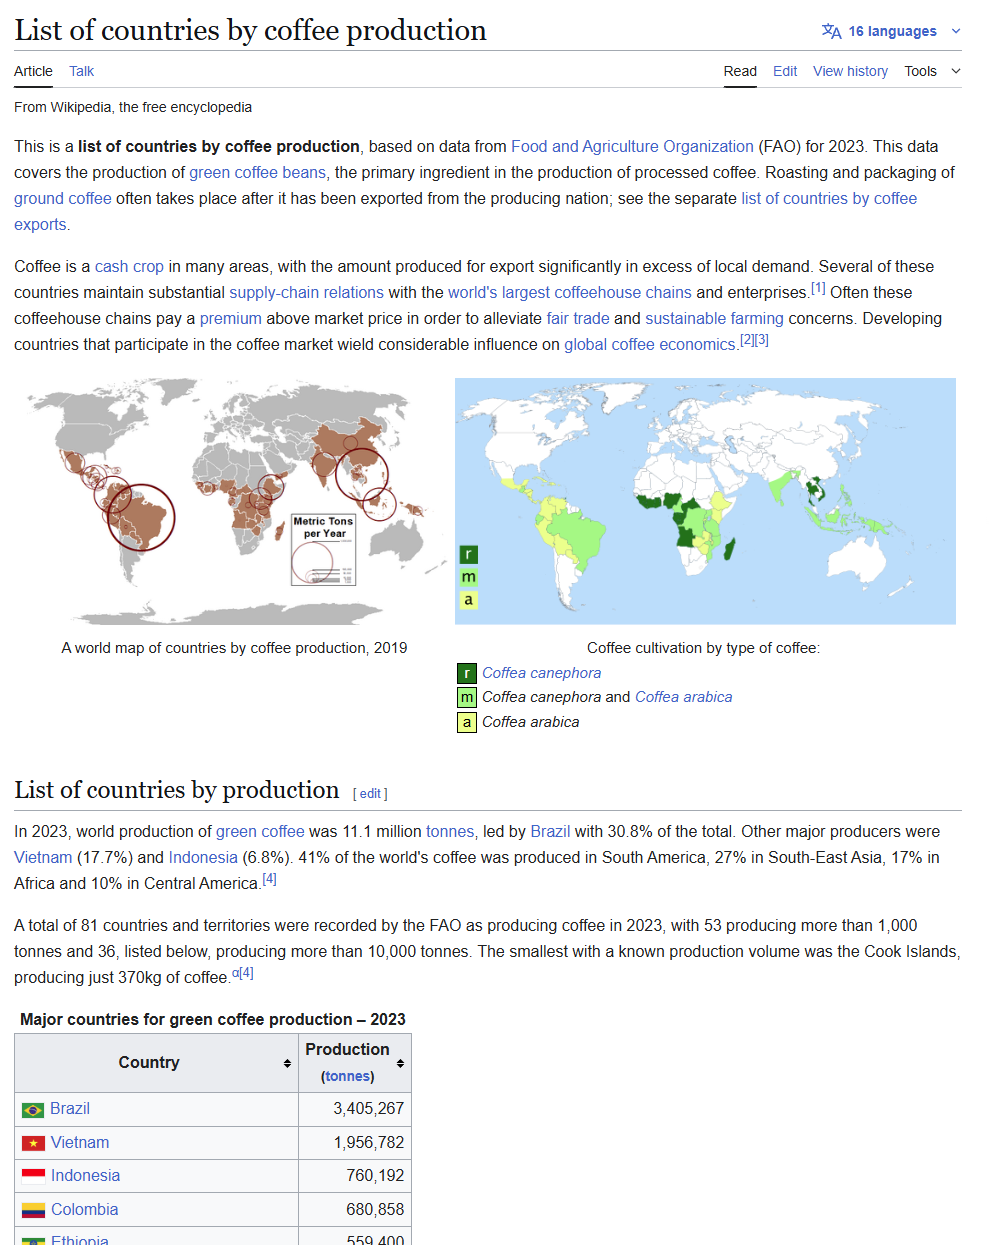

In [9]:
#rl = "https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production"
url = "https://en.wikipedia.org/w/index.php?title=List_of_countries_by_coffee_production&oldid=1284105905"
headers = {"User-Agent": "imt2200-class-notebook"}
page = requests.get(url, headers=headers, timeout=10)
print(page.status_code)  # debería ser 200
html = page.text[:500]   # primeras 500 letras de la página
print(html)

200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vect


In [10]:
soup = bs(page.text)
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by coffee production - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-c

Al inspeccionar la página, podemos ver que los nombres de países y cantidades están enmarcadas por la etiqueta `<table>`. Dado que es la primera tabla de la página, fondemos usar la función `find` para extraerla. Esto nos entrega todo el contenido de la tabla, incluyendo el encabezado (primera fila) y las cantidades en distintas unidades.

In [11]:
tables = soup.find_all('table')
len(tables)

5

In [12]:
tables[0]

<table class="wikitable col2right" style="float:right; clear:right; margin-right:1em;">
<caption>Coffee, green production – 2022
</caption>
<tbody><tr>
<th width="170">Country
</th>
<th scope="col">Production<br/><small>(<a href="/wiki/Tonne" title="Tonne">tonnes</a>)</small>
</th></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="700" data-file-width="1000" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/40px-Flag_of_Brazil.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/60px-Flag_of_Brazil.svg.png 2x" width="22"/></span></span> </span><a href="/wiki/Brazil" title="Brazil">Brazil</a></td>
<td>3,172,562
</td></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" sr

In [13]:
table = soup.find('table')
table

<table class="wikitable col2right" style="float:right; clear:right; margin-right:1em;">
<caption>Coffee, green production – 2022
</caption>
<tbody><tr>
<th width="170">Country
</th>
<th scope="col">Production<br/><small>(<a href="/wiki/Tonne" title="Tonne">tonnes</a>)</small>
</th></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="700" data-file-width="1000" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/40px-Flag_of_Brazil.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/60px-Flag_of_Brazil.svg.png 2x" width="22"/></span></span> </span><a href="/wiki/Brazil" title="Brazil">Brazil</a></td>
<td>3,172,562
</td></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" sr

Pasemos esto a un DataFrame.

In [ ]:
tables[1]

In [ ]:
#creamos un DataFrame vacío con los títulos de la tabla
df = pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

# iterar sobre cada fila ('tr') para completar la información
for row in tables[1].find_all('tr')[1::]:
    cols = row.find_all("td")
    if len(cols) > 0:
        #print(cols)
        cols = [col.text.strip() for col in cols]
        #print(cols)
        country = cols[1]
        bags = cols[2]
        tons = cols[3]
        pounds = cols[4]
        new_row = pd.DataFrame({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, index=['country'])
        df = pd.concat([df, new_row], ignore_index=True)
df.head()

In [ ]:
# total de exportación
df['tons_metric'].sum()

In [ ]:
bags

In [ ]:
type(bags)

In [ ]:
int(bags)

In [ ]:
int(bags.replace(',', ''))

In [ ]:
#creamos un DataFrame vacío con los títulos de la tabla
df = pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

# iterar sobre cada fila ('tr') para completar la información
for row in tables[1].find_all('tr')[1::]:
    cols = row.find_all("td")
    if len(cols) > 0:
        #print(cols)
        cols = [col.text.strip() for col in cols]
        #print(cols)
        country = cols[1]
        bags = int(cols[2].replace(',', ''))
        tons = int(cols[3].replace(',', ''))
        pounds = int(cols[4].replace(',', ''))
        new_row = pd.DataFrame({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, index=['country'])
        df = pd.concat([df, new_row], ignore_index=True)
df.head()

In [ ]:
# total de exportación
df['tons_metric'].sum()

In [ ]:
100*df['tons_metric'][0]/df['tons_metric'].sum()

<div class="alert alert-block alert-info">
<b> Desafío:</b> En la página  está una tabla con los principales fabricantes de vino en el mundo entre 2010 y 2018. Escriba un código que, en forma automática, tome los datos de esa tabla y genere un gráfico que muestre el porcentaje que representa la producción de Chile respecto del mundo a lo largo de esos años.
    
<b> Las tres primeras respuestas correctas tienhttps://en.wikipedia.org/wiki/Winemakingen +0.2 en la Tarea 1.</b>
</div>

In [78]:
# librerías
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt

In [79]:

url = 'https://en.wikipedia.org/wiki/Winemaking'
headers = {"User-Agent": "imt2200-class-notebook"}
page = requests.get(url, headers=headers, timeout=10)
print(page.status_code)  # debería ser 200
html = page.text   # primeras 500 letras de la página
print(html)

200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Winemaking - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feat

In [80]:
soup = bs(page.text)
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Winemaking - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [81]:
tables = soup.find_all('table')
len(tables)

16

In [82]:
#creamos un DataFrame vacío con los títulos de la tabla
df = pd.DataFrame(columns = ['country', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

# iterar sobre cada fila ('tr') para completar la información
for row in tables[1].find_all('tr')[1::]:
    cols = row.find_all("td")
    if len(cols) > 0:
        #print(cols)
        cols = [col.text.strip() for col in cols]
        #print(cols)
        country = cols[0]
        M2010 = (cols[1].replace(',', ''))
        M2011 = (cols[2].replace(',', ''))
        M2012 = (cols[3].replace(',', ''))
        M2013 = (cols[4].replace(',', ''))
        M2014 = (cols[5].replace(',', ''))
        M2015 = (cols[6].replace(',', ''))
        M2016 = (cols[7].replace(',', ''))
        M2017 = (cols[8].replace(',', ''))
        M2018 = (cols[9].replace(',', ''))
        new_row = pd.DataFrame({'country': country, '2010': M2010, '2011': M2011,'2012':M2012, '2013':M2013, '2014':M2014, '2015':M2015, '2016':M2016, '2017':M2017, '2018':M2018}, index=['country'])
        df = pd.concat([df, new_row], ignore_index=True)
df.head(9)


,country,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Italy,48525,42772,45616,52029,44739,50000,50900,42500,48500
1,France,44381,50757,41548,42004,46698,47000,45200,36600,46400
2,Spain,35353,33397,31123,45650,41620,37700,39300,32500,40900
3,United States,20887,19140,21650,23590,22300,21700,23600,23300,23900
4,Argentina,16250,15473,11778,14984,15197,13400,9400,11800,14500
5,Australia,11420,11180,12260,12500,12000,11900,13100,13900,12500
6,South Africa,9327,9725,10569,10982,11316,11200,10500,10800,9500
7,China,13000,13200,13511,11780,11178,11500,11400,11400,10800
8,Chile,8844,10464,12554,12820,10500,12900,10100,9500,12900


In [83]:
mipais= df[df['country'] == 'Chile']
mipais


,country,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,Chile,8844,10464,12554,12820,10500,12900,10100,9500,12900


In [91]:
for año in df.columns[1:]:
    df[año] = pd.to_numeric(df[año], errors="coerce")

total_paises = df.drop(columns="country").sum()

chile = df[df["country"].str.contains("Chile")].drop(columns="country").iloc[0]

porcentaje = (chile / total_paises) * 100

print("Producción de vino de Chile como % del mundo entre 2010-2018:")
print(porcentaje.round(2))


Producción de vino de Chile como % del mundo entre 2010-2018:
2010    3.82
2011    4.52
2012    5.56
2013    5.05
2014    4.34
2015    5.27
2016    4.22
2017    4.36
2018    5.20
dtype: float64


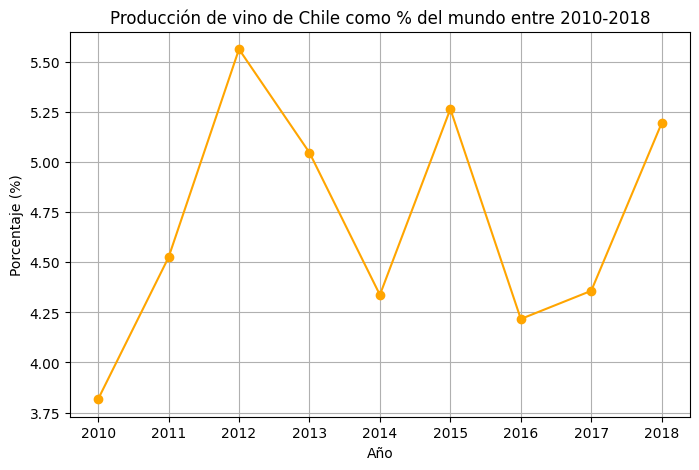

In [92]:
plt.figure(figsize=(8,5))
plt.plot(porcentaje.index, porcentaje.values, marker="o", linestyle="-", color="orange")
plt.title("Producción de vino de Chile como % del mundo entre 2010-2018")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Año")
plt.grid(True)
plt.show()